## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
        - shift: 그리기 좌표값의 축소 비율. 기본값=0 일반적으로는 쓸일 없다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None, shift=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단(xmin, ymin), 우측하단(xmax, ymax) 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플 지정. (x,y): 좌상단 좌표
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None, shift): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None, shift=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.
        - bottomLeftOrigin: bool. True이면 이미지의 좌측하단을 원점으로 간주. 거의 기본값 사용.

In [25]:
import cv2
import numpy as np

img = np.full(shape=(400,400,3), fill_value=255, dtype=np.uint8)

cv2.line(img, (50,50), (200,50), (0,0,255), 5)  #(50,50): 시작 좌표(x,y), (200,50): 끝 좌표, 선 색:(B,G,R), 5: 선 두께
cv2.line(img, (50,50), (150,150), (0,0,128), 4)

# 사각형
cv2.rectangle(img, (50,200), #좌상단 (xmin,ymin)
              (300,350), #우하단(xmax, ymax)
               color=(255,0,0))
cv2.rectangle(img, (200,200, 50,150), #(좌상단 x, y, width, height) 
              color=(0,255,0),
              thickness=-1) #두께: -1 => 색을 채운다

# 원
cv2.circle(img, (300,100), #center: x, y
           30, #반지름
           (255,255,0), #color
           -1, #두께
           )
cv2.circle(img, (300,100), 60, (255,0,0), 2)

# 다각형
pts = np.array([[250,200],
                [300,200],
                [350,300],
                [250,300]
               ])

cv2.polylines(img, [pts],
              False,
              color=(255,0,0),
              thickness=2
              )

# 텍스트
text = "Hello OpenCV"
# text = "안녕하세요" #opencv 제공 폰트들이 한글 지원 X
cv2.putText(img,
            text, #이미지에 그릴 글자들
            (50,300), #글씨를 출력할 위치
            cv2.FONT_HERSHEY_SIMPLEX,
            1, #font size
            (100,100,100), #색
            2, #두께
            cv2.LINE_AA
           )

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lenna Image에 텍스트 그리기

In [26]:
txt = 'Lenna Forsen'

In [30]:
lenna = cv2.imread('./images/lenna.bmp')
lenna_txt = lenna.copy()
cv2.putText(lenna_txt, txt, (190,450), cv2.FONT_HERSHEY_SIMPLEX, 2, color=(255,255,255))
cv2.imshow('src', lenna)
cv2.imshow('txt', lenna_txt)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 한글 출력 => Pillow 라이브러리 이용

In [34]:
# Malgun gothic 폰트 경로 조회
import matplotlib as mpl
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
font_list[:5]

291


['C:\\WINDOWS\\Fonts\\constanb.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\Candaral.ttf',
 'C:\\WINDOWS\\Fonts\\javatext.ttf',
 'C:\\WINDOWS\\Fonts\\verdanab.ttf']

In [35]:
malgun_list = [font for font in font_list if 'malgun' in font.lower()]
print(len(malgun_list))
malgun_list

6


['C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\WINDOWS\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\WINDOWS\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\WINDOWS\\Fonts\\malgunsl.ttf']

In [36]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

In [37]:
!pip install pillow

In [40]:
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2

img = np.full((400,400,3), fill_value=255, dtype=np.uint8)

# Pillow를 이용해 이미지에 한글 출력
# 폰트 설정
font = ImageFont.truetype(font_path, 20) #폰트 경로, 폰트 크기(기본:10)
#ndarray(이미지)를 pillow image 형식으로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)  #Image에 글씨를 쓸 수 있는 Draw 형태로 변환
draw.text((60,70), "안녕하세요, OpenCV입니다.", font=font, fill=(0,0,0)) #fill글씨색 - (RGB)
# Pillow 이미지를 ndarray 변환(opencv)
img = np.array(img_pil)

# 영문
cv2.putText(img, "hello world", (50,150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [41]:
lenna = cv2.imread('./images/lenna.bmp')
lenna.shape

(512, 512, 3)

In [48]:
height_s = int(lenna.shape[0] / 4)  #시작 height
height_e = height_s * 3            #끝 height
width_s = int(lenna.shape[1] / 4)  #시작 width
width_e = width_s * 3              #끝 width
print(height_s, height_e, width_s, width_e)

128 384 128 384


In [49]:
cropped_lenna = lenna[height_s:height_e, width_s:width_e]

In [50]:
cv2.imshow('src', lenna)
cv2.imshow('cropped', cropped_lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
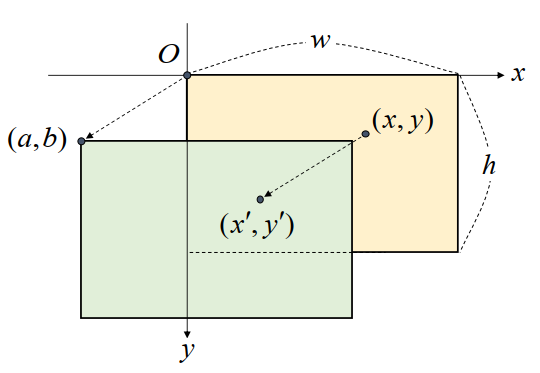

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$



- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderModel: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. 0: 검정, 1: 흰색

In [ ]:
import cv2
import numpy as np

lenna = cv2.imread('./images/lenna.bmp')
a, b = 100, 200 #a: 가로 이동 범위, b: 세로 이동 범위
# offline 변환 행렬 (2 x 3)
aff_matrix = np.array([[1, 0, a],
                       [0, 1, b]], dtype=np.float32)

img = cv2.warpAffine(lenna, aff_matrix, (0,0))

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
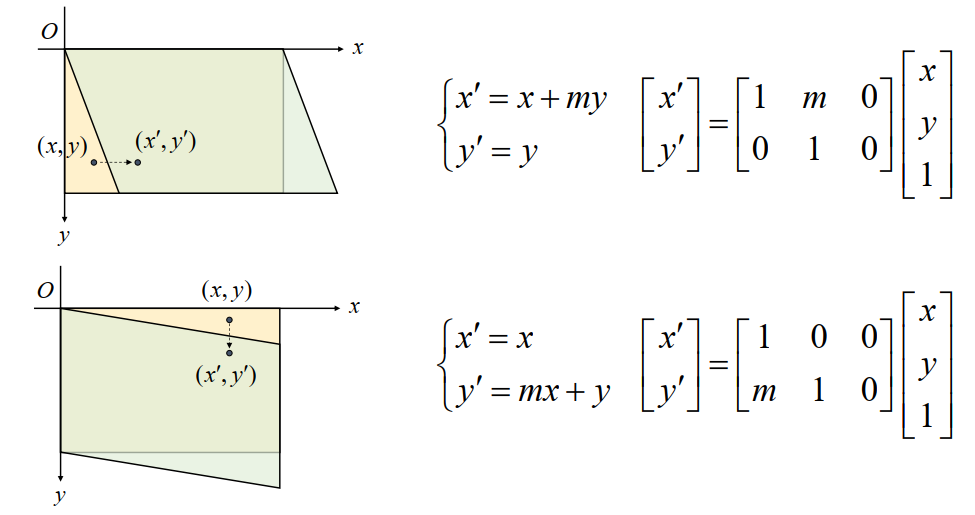
<center>m: 비율</center>

In [51]:
lenna = cv2.imread('./images/lenns.bmp')
m = 0.1
aff_matrix1 = np.array([[1, m, 0],    
                       [0, 1, 0]])

aff_matrix2 = np.array([[1, 0, 0],
                        [m, 1, 0]])

img = cv2.warpAffine(lenna, aff_matrix, (0,0))
img2 = cv2.warpAffine(lenna, aff_matrix2, (0,0))

cv2.imshow('src', lenna)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'aff_matrix' is not defined

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (height, width)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

In [53]:
rose = cv2.imread('./images/rose.bmp')
rose.shape

(320, 480, 3)

In [57]:
rose_small = cv2.resize(rose, (160, 240), interpolation=cv2.INTER_AREA)
rose_big = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_NEAREST)
rose_big2 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_LINEAR)
rose_big3 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_CUBIC)
rose_big4 = cv2.resize(rose, (960, 640), interpolation=cv2.INTER_LANCZOS4)

# cv2.imshow('src', rose)
# cv2.imshow('small', rose_small)
cv2.imshow('big-nearest', rose_big)
cv2.imshow('big-linear', rose_big2)
cv2.imshow('big-cubic', rose_big3)
cv2.imshow('big-lanczos', rose_big4)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rose_resize1 = cv2.resize(rose, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)  #비율로 크기 지정, 절반
rose_resize2 = cv2.resize(rose, (0,0), fx=3, fy=3, interpolation=cv.INTER_CUBIC)  #3배

cv2.imshow('resize1', rose)

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


## 회전(Rotate)
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - ROTATE_90_CLOCKWISE: 시계방향 90도
            - ROTATE_180: 180도 회전
            - ROTATE_90_COUNTERCLOCKWISE: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - warpAffine()을 이용해 회전 처리
    - getRotationMatrix2D(center, angle, scale)
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도
        - scale: 이미지 확대 및 축소 비율
    - warpAffine(src, M, dsize)
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

In [58]:
# rotate()
lenna = cv2.imread('./images/lenna.bmp')

In [60]:
lenna_90 = cv2.rotate(lenna, cv2.ROTATE_90_CLOCKWISE)  #시계방향 90도
lenna_180 = cv2.rotate(lenna, cv2.ROTATE_180)  #180도
lenna_270 = cv2.rotate(lenna, cv2.ROTATE_90_COUNTERCLOCKWISE)  #시계방향 270, 반시계방향 90

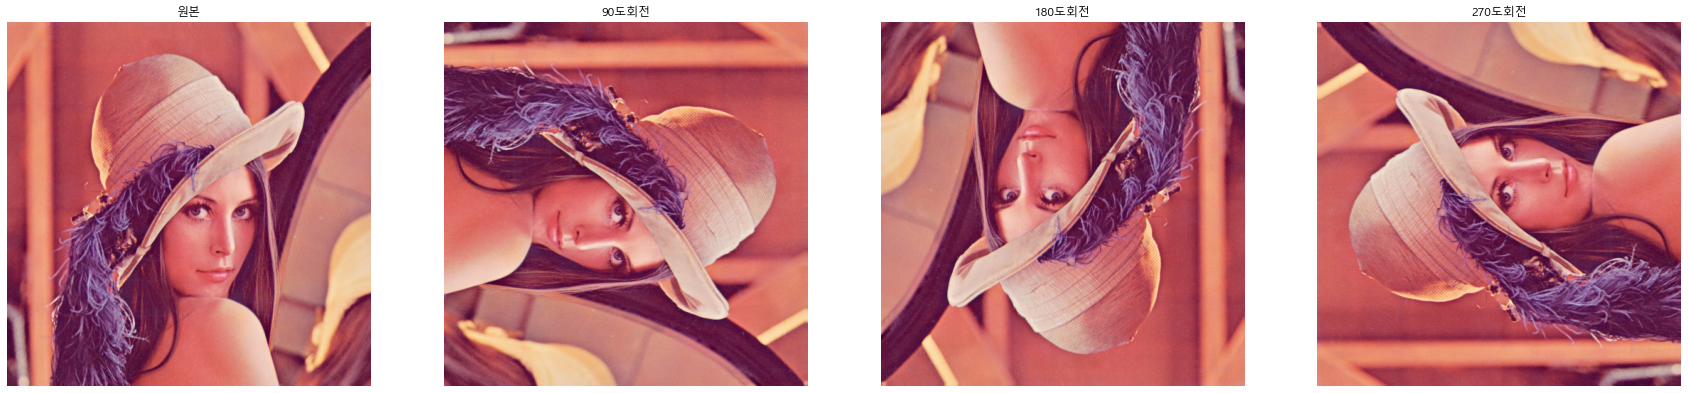

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
row, col = 1, 4

plt.subplot(row, col, 1)
plt.imshow(lenna[:,:,::-1])
plt.title('원본')
plt.axis('off')

plt.subplot(row, col, 2)
plt.imshow(lenna_90[:,:,::-1])
plt.title('90도회전')
plt.axis('off')

plt.subplot(row, col, 3)
plt.imshow(lenna_180[:,:,::-1])
plt.title('180도회전')
plt.axis('off')

plt.subplot(row, col, 4)
plt.imshow(lenna_270[:,:,::-1])
plt.title('270도회전')
plt.axis('off')

plt.show()

In [63]:
# 원하는 각도만큼 회전 - 각도: 양수 - 시계반대방향, 음수 - 시계방향
center_x, center_y = int(lenna.shape[1]/2), int(lenna.shape[0]/2)
print(center_x, center_y)

256 256


In [ ]:
angle = 45  #반시계방향 45도